<a href="https://colab.research.google.com/github/hassaannoor/handwriting-cloner/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ankanbhunia/Handwriting-Transformers
%cd Handwriting-Transformers
!pip install --upgrade --no-cache-dir gdown
!gdown --id 16g9zgysQnWk7-353_tMig92KsZsrcM6k && unzip files.zip && rm files.zip

Cloning into 'Handwriting-Transformers'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 544 (delta 155), reused 135 (delta 135), pack-reused 364 (from 1)
Receiving objects: 100% (544/544), 67.89 MiB | 28.64 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/Handwriting-Transformers
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16g9zgysQnWk7-353_tMig92KsZsrcM6k
From (redirected): https://drive.google.com/uc?id=16g9zgysQnWk7-353_tMig92KsZsrcM6k&confirm=t&uuid=48aa7475-638a-4155-9e73-d28843baff32
To: /content/Handwriting-Transformers/files.zip
100% 685M/685M [00:10<00:00, 63.2MB/s]
Archive:  files.zip
  inflating: files/cvl_model.pth     
 

In [2]:
import os
import time
from data.dataset import TextDataset, TextDatasetval
import torch
import cv2
import os
import numpy as np
from models.model import TRGAN
from params import *
from torch import nn
from data.dataset import get_transform
import pickle
from PIL import Image
import tqdm
import shutil

In [3]:
text = "A paragraph is a series of related sentences developing a central idea, called the topic. Try to think about paragraphs in terms of thematic unity: a paragraph is a sentence or a group of sentences that supports one central, unified idea. Paragraphs add one idea at a time to your broader argument"
output_path = 'results'

In [4]:
model_path = 'files/iam_model.pth'; data_path = 'files/IAM-32.pickle' #(iam)
#model_path = 'files/cvl_model.pth'; data_path = 'files/CVL-32.pickle' #(cvl)
#model_path = 'files/iam_model.pth'; data_path = 'files/CVL-32.pickle' #(iam-cvl-cross)
#model_path = 'files/cvl_model.pth'; data_path = 'files/IAM-32.pickle' #(cvl-iam-cross)#

In [5]:
print ('(1) Loading dataset files...')

TextDatasetObjval = TextDatasetval(base_path = data_path, num_examples = 15)
datasetval = torch.utils.data.DataLoader(
            TextDatasetObjval,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True, drop_last=True,
            collate_fn=TextDatasetObjval.collate_fn)

print ('(2) Loading model...')

model = TRGAN()
model.netG.load_state_dict(torch.load(model_path))
print (model_path+' : Model loaded Successfully')

print ('(3) Loading text content...')
text_encode =  [j.encode() for j in text.split(' ')]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to('cuda:0').repeat(batch_size, 1, 1)


(1) Loading dataset files...
(2) Loading model...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 182MB/s]


initialize network with N02
initialize network with N02
initialize network with N02


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


100%|██████████| 91.2M/91.2M [00:00<00:00, 181MB/s]


files/iam_model.pth : Model loaded Successfully
(3) Loading text content...


In [6]:

if os.path.isdir(output_path): shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok = True)

for i,data_val in enumerate(tqdm.tqdm(datasetval)):

    page_val = model._generate_page(data_val['simg'].to(DEVICE), data_val['swids'], eval_text_encode,eval_len_text)

    cv2.imwrite(output_path+'/image' + str(i) + '.png', page_val*255)

print ('\nOutput images saved in : ' + output_path)

100%|██████████| 20/20 [00:27<00:00,  1.35s/it]


Output images saved in : results


In [7]:
# ===== NEXT CELL: GENERATE + DISPLAY HANDWRITING =====

from PIL import Image
from IPython.display import display

text = """
A paragraph is a series of related sentences developing a central idea, called the topic.
Try to think about paragraphs in terms of thematic unity.
A paragraph supports one central, unified idea.
"""

# Encode text
text_encode = [w.encode() for w in text.split(" ")]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to(DEVICE).repeat(batch_size, 1, 1)

# Get ONE batch for style
data_val = next(iter(datasetval))

# Generate page
page = model._generate_page(
    data_val["simg"].to(DEVICE),
    data_val["swids"],
    eval_text_encode,
    eval_len_text
)

# Convert and display
img = Image.fromarray((page * 255).astype("uint8"))
display(img)


KeyError: '\n'

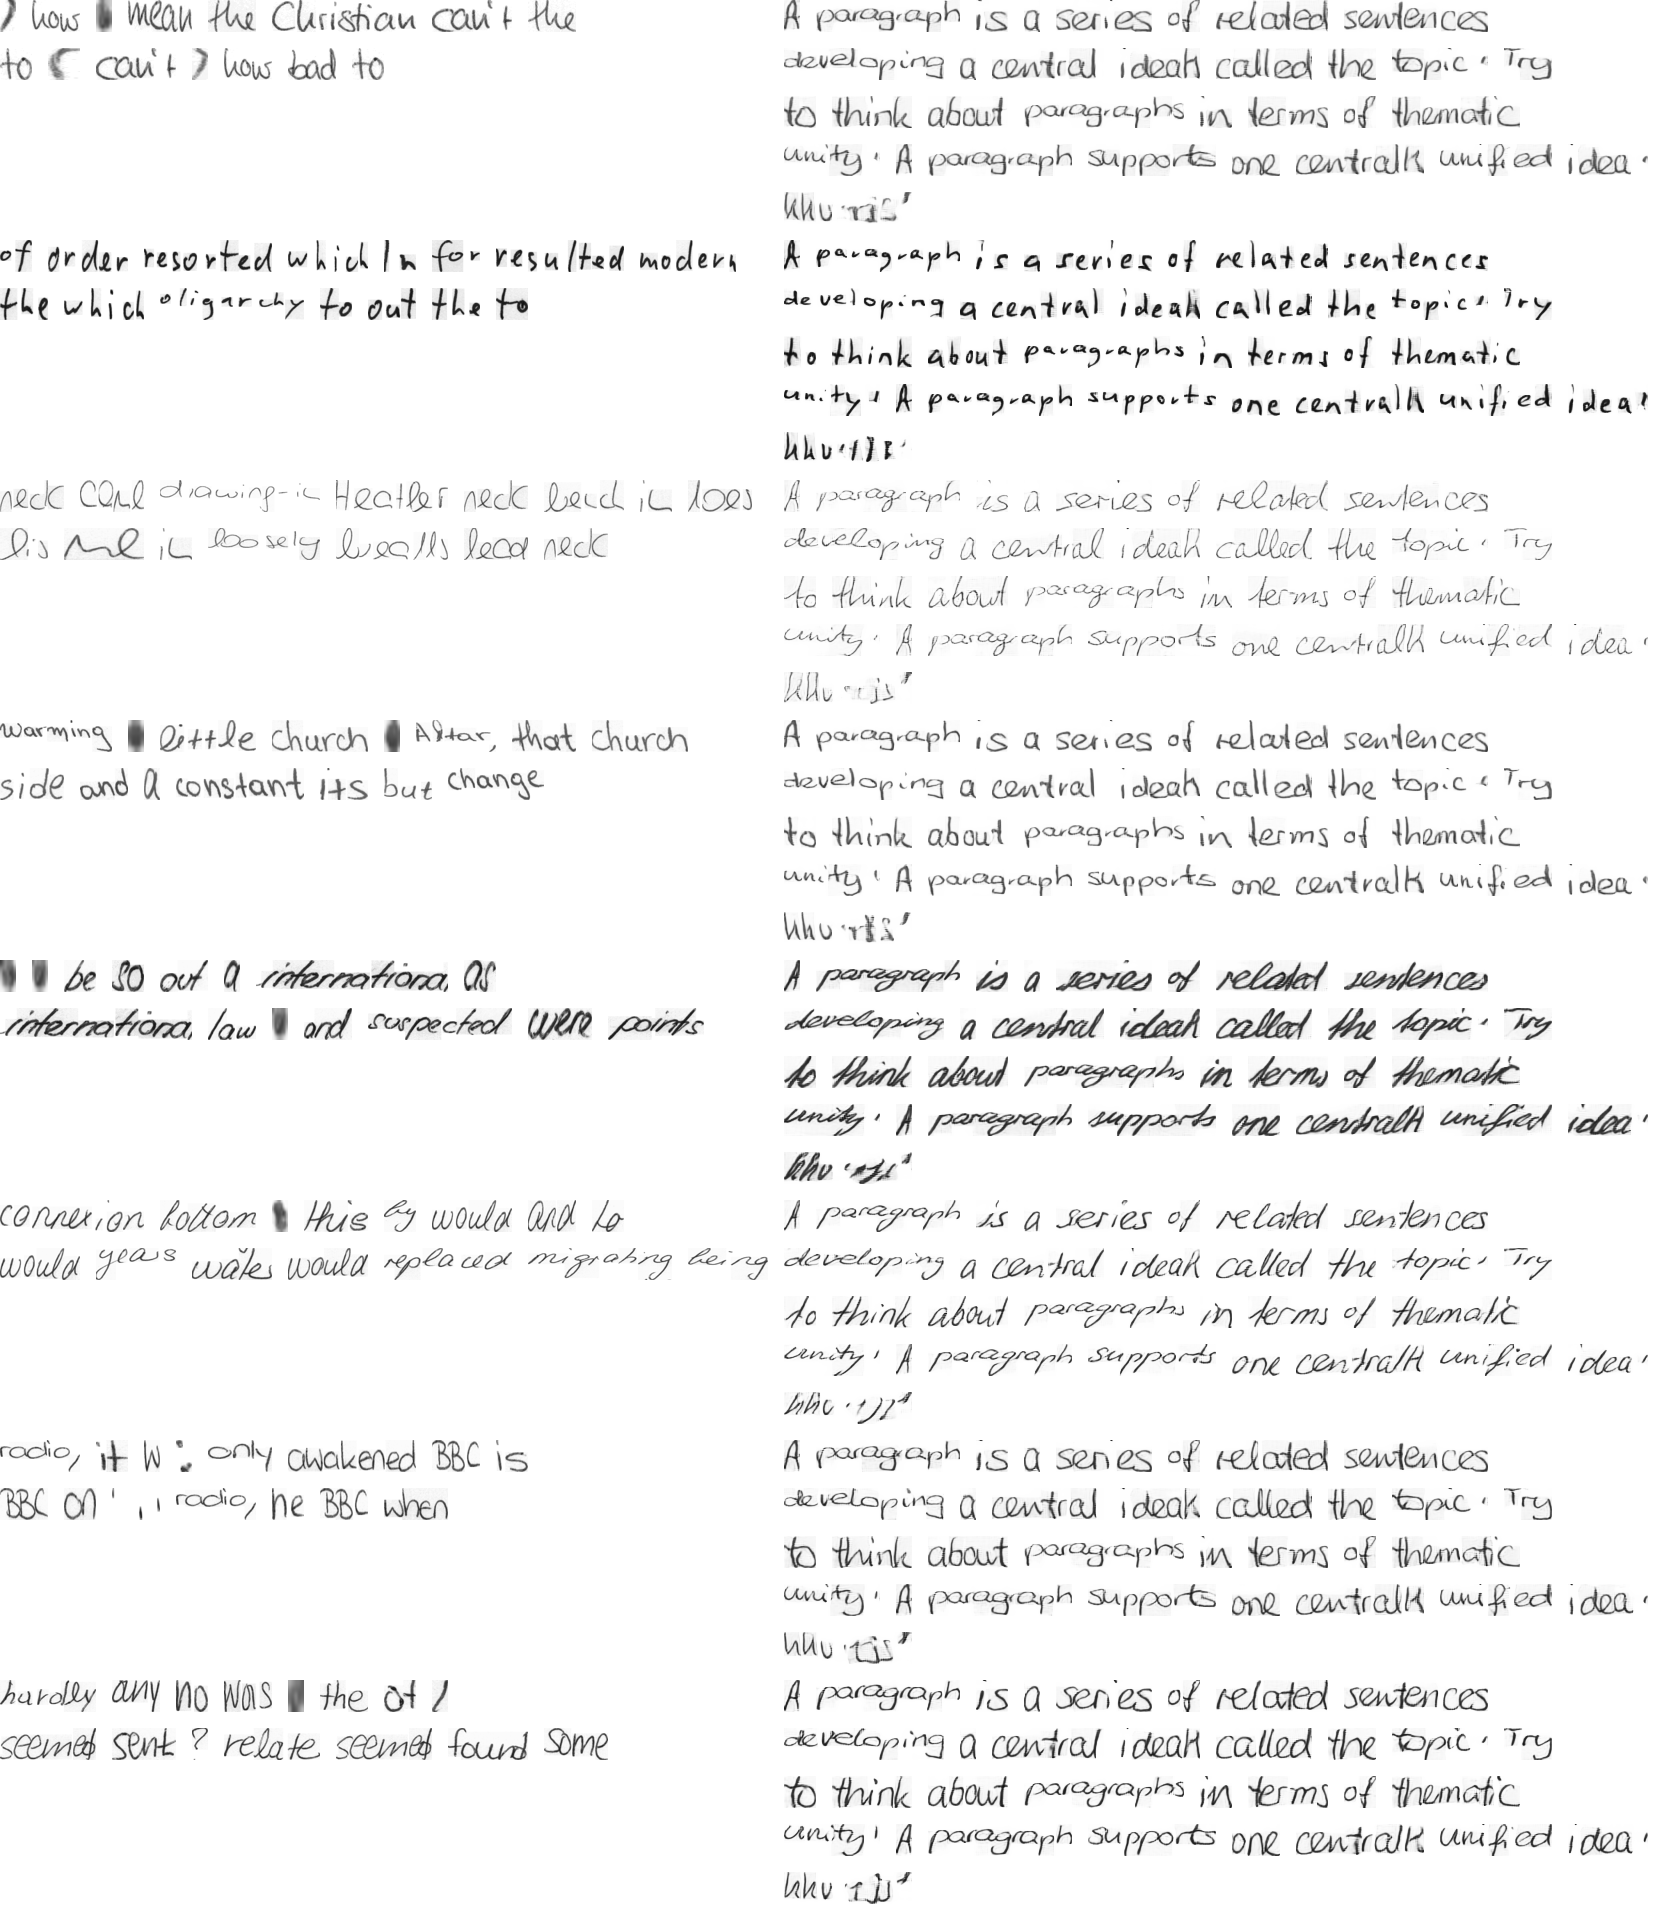

In [10]:
# ===== FIXED: GENERATE + DISPLAY HANDWRITING (NO KeyError) =====

from PIL import Image
from IPython.display import display

text = """
A paragraph is a series of related sentences developing a central idea, called the topic.
Try to think about paragraphs in terms of thematic unity.
A paragraph supports one central, unified idea. 994.;?!'
"""

# IMPORTANT: remove newlines
text = " ".join(text.split())

# Encode text
text_encode = [w.encode() for w in text.split(" ")]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to(DEVICE).repeat(batch_size, 1, 1)

# Get ONE batch for style
data_val = next(iter(datasetval))

# Generate handwritten page
page = model._generate_page(
    data_val["simg"].to(DEVICE),
    data_val["swids"],
    eval_text_encode,
    eval_len_text
)

# Display image
img = Image.fromarray((page * 255).astype("uint8"))
display(img)


In [13]:
!git clone https://github.com/hassaannoor/handwriting-cloner.git

fatal: destination path 'handwriting-cloner' already exists and is not an empty directory.


In [ ]:
%cd handwriting-cloner/ && pip install -r requirements.txt

In [23]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 2), reused 7 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (7/7), 602 bytes | 602.00 KiB/s, done.
From https://github.com/hassaannoor/handwriting-cloner
   3c0010d..22d7bb7  main       -> origin/main
Updating 3c0010d..22d7bb7
Fast-forward
 .gitignore                              | 2 --
 dataset_processing/raw_pages/.gitignore | 2 ++
 style_learning/style_dataset/.gitignore | 2 ++
 3 files changed, 4 insertions(+), 2 deletions(-)
 create mode 100644 dataset_processing/raw_pages/.gitignore
 create mode 100644 style_learning/style_dataset/.gitignore


In [21]:
!python pipeline.py

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
E0000 00:00:1765650926.518594    7108 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765650926.524883    7108 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765650926.541653    7108 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765650926.541679    7108 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target mo

In [24]:
!cd dataset_processing && python extract_lines_from_pages.py

Saved 52 line images


In [27]:
!cd style_learning && python train_style_encoder.py

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 0 | Loss 12.0722
Epoch 1 | Loss 11.1363
Epoch 2 | Loss 10.1883
Epoch 3 | Loss 9.3438
Epoch 4 | Loss 8.5693
Epoch 5 | Loss 7.5586
Epoch 6 | Loss 6.6928
Epoch 7 | Loss 5.8250
Epoch 8 | Loss 5.1536
Epoch 9 | Loss 4.3866
Epoch 10 | Loss 3.8309
Epoch 11 | Loss 3.2281
Epoch 12 | Loss 2.8067
Epoch 13 | Loss 2.484

In [28]:
!cd style_learning && python extract_style.py

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Saved style vector as my_style.pt


In [51]:
!cd style_learning && python create_train_pairs.py

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Saved style vector as my_style.pt
Using cache found in /root/.cache/torch/hub/pytorch_vision_main
Created train_pairs.pickle


In [52]:
!cd generator && python train_generator.py

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
initialize network with N02
Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete

In [53]:
!cd generator && python inference.py --style ../style_learning/my_style.pt --text "Your text here"

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
initialize network with N02
Loaded generator weights.
Generated Tensor Stats: Min=0.8088, Max=1.0000, Mean=0.9009
Saved generated handwriting to generated.png
